# Introduction to Neural Networks: Bank Churn prediction

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary:

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
!pip uninstall tensorflow -y


Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0


In [ ]:

!pip install tensorflow==2.10.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 37.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2

In [ ]:
#importing tensorflow
import tensorflow as tf
print(tf.__version__)

2.10.0


In [ ]:
import keras
print(keras.__version__)

2.10.0


In [ ]:
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA
import seaborn as sns
import keras

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Importing backend
from tensorflow.keras import backend

# Importing shffule
from random import shuffle
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Importing optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

# Importing KerasClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# To suppress scientific notations
#pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
data=pd.read_csv("Churn.csv")

# save data into a version as a copy
churn=data.copy()

## Data Overview

In [ ]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
churn.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?
2. How many active members are there with the bank?
3. How are the different customer attributes correlated to each other?
4. Who is churning more when compared to males and females?  
5. Customers from which geographical part are churning more?

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


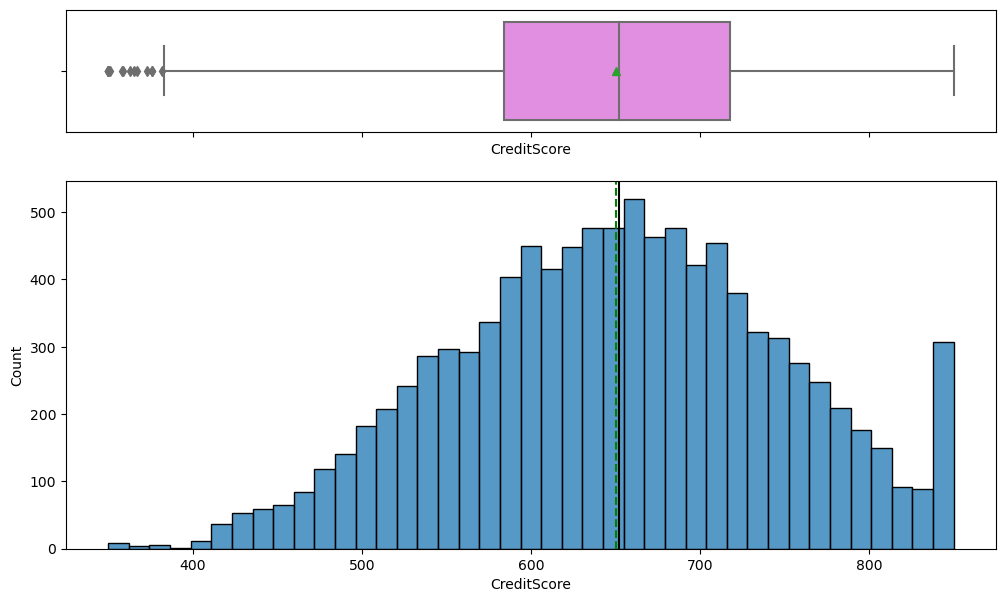

In [ ]:
continuous_variables = ['CreditScore']

for continuous in continuous_variables:
    histogram_boxplot(data, continuous)


1. What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?
Answer: Quite similar to a normal distribution, with a spike at the right end of the curve above the value of 850. There are some outliers (less than 10) below the 25% quartile, which the creditScore value of less than 370.

2. How many active members are there with the bank?

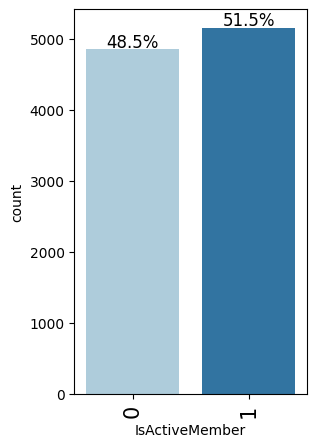

In [ ]:
labeled_barplot(churn, 'IsActiveMember', perc = True)

In [ ]:
numberActive = churn[churn['IsActiveMember']==1].sum()
print(numberActive.IsActiveMember)

5151


There are 5151 Active Members in the Churn data set.

3. How are the different customer attributes correlated to each other?

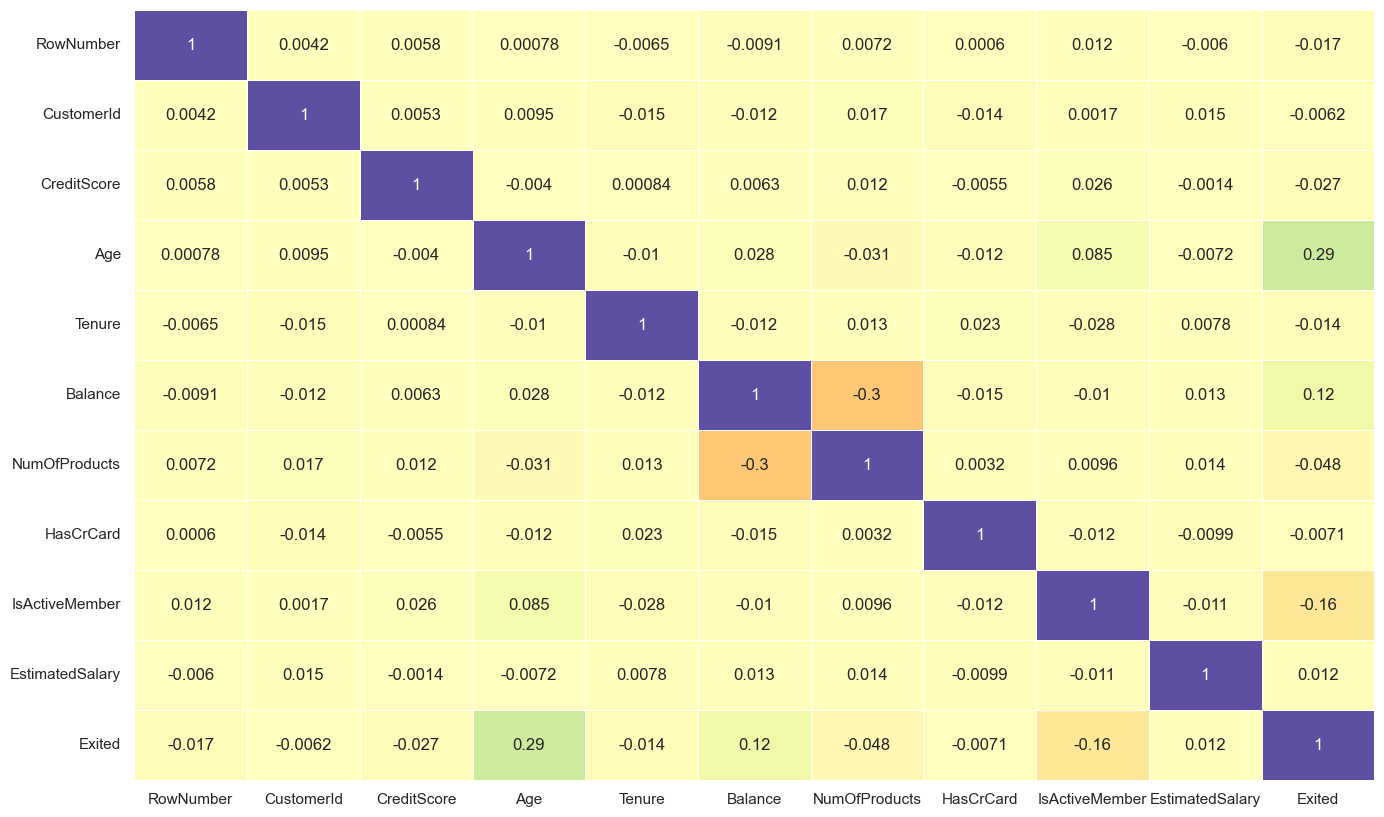

In [ ]:
#only select numberic rows for heatmap chart
churn_numeric = churn.select_dtypes(include='number')

sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(churn_numeric.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="Spectral")
plt.show()

- The only relatively higher correlated columns are :
    1) Exited and age with correlation  = 0.29
    2) NumOfProducts and Balance with correlation  = -0.3
    
These correlation values are considered rather low levels of correlation, thus these columns will not be dropped from the churn data set as they may play a role in the
neural network model.

4. Who is churning more when compared to males and females?  

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


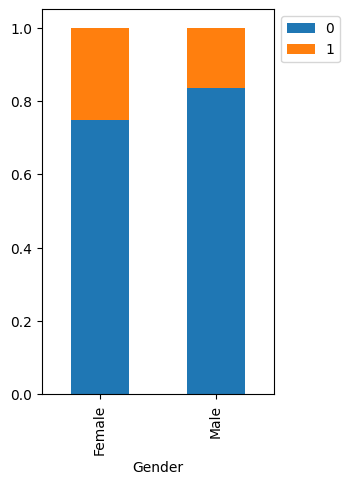

In [ ]:
categorical_variables = ['Gender']

for categorical in categorical_variables:
    stacked_barplot(churn,categorical,"Exited")

Females are churning more than males. The exit (=1) is higher for females than males.
1139/4543 females exited, as compared to 898/5457 males exited.

5. Customers from which geographical part are churning more?

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


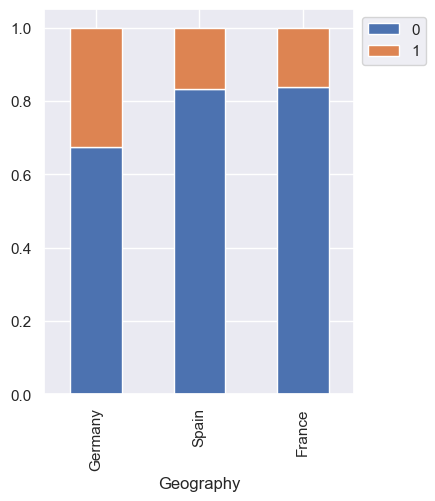

In [ ]:
categorical_variables = ['Geography']

for categorical in categorical_variables:
    stacked_barplot(churn,categorical,"Exited")

Customers from Germany churning more than Spain or France. The exit (=1) is higher for Germans than for those from Spain/France.
814/2509 Germans exited, as compared to 810/5014 French and 413/ 2477 Spanish.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no null values in the dataset Churn.

In [ ]:
churn['Exited'].nunique()

2

There are only two classes whether someone is still an active member (1 or 0).

In [ ]:
#checking the percentage of each class in the dataset
(churn.Exited.value_counts())/(churn.Exited.count())

0    0.7963
1    0.2037
Name: Exited, dtype: float64

There are unbalanced proportions of exited members(0.7963) and non-exited members (0.2037). It may be necessary to use SMOTE to balance the entries entering into the neural model.

In [ ]:
#Dropping less relevant columns feature
churn = churn.drop("CustomerId", axis = 1)
churn = churn.drop("RowNumber", axis = 1)
churn = churn.drop("Surname", axis = 1)


These columns (CustomerId, RowNumber, Surname) add no valuable information to the neural network, thus they are dropped.

In [ ]:
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X_data = churn.iloc[:,0:10]
y_data = churn.iloc[:, -1]


In [ ]:
X_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y_data.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
#printing the shape of the data
print(y_data.shape)
print(X_data.shape)

(10000,)
(10000, 10)


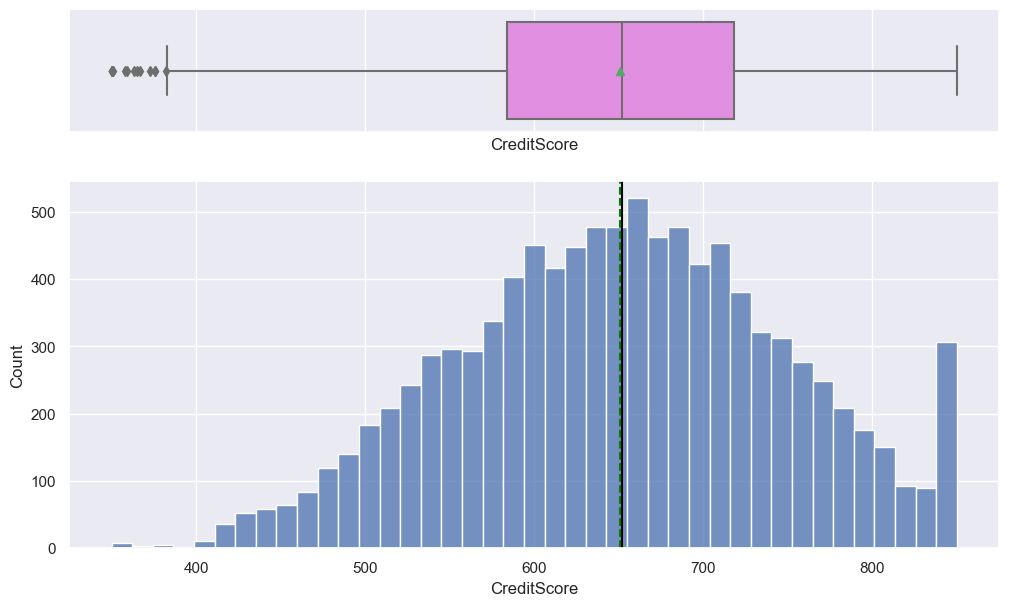

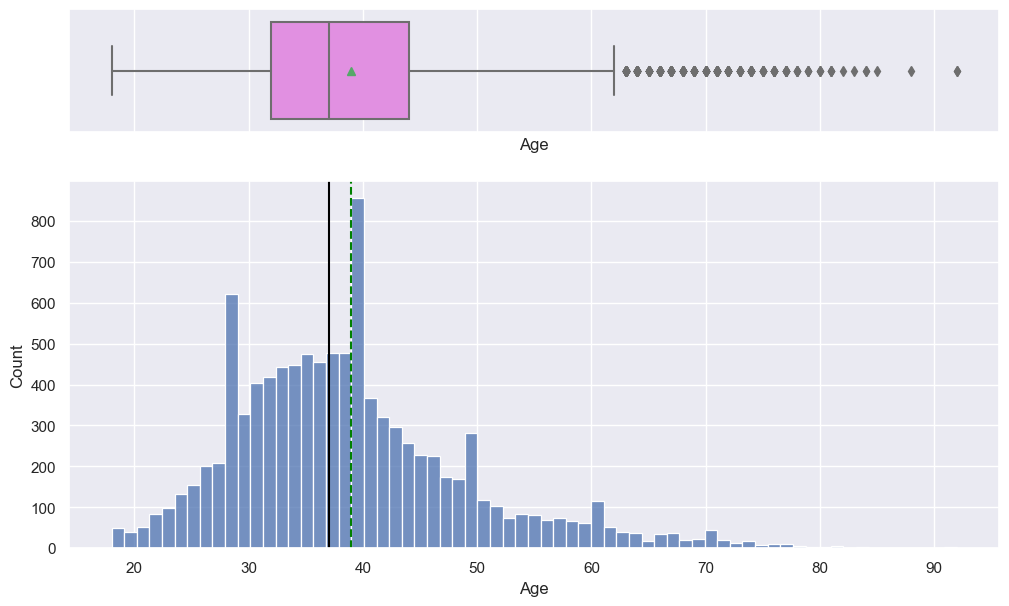

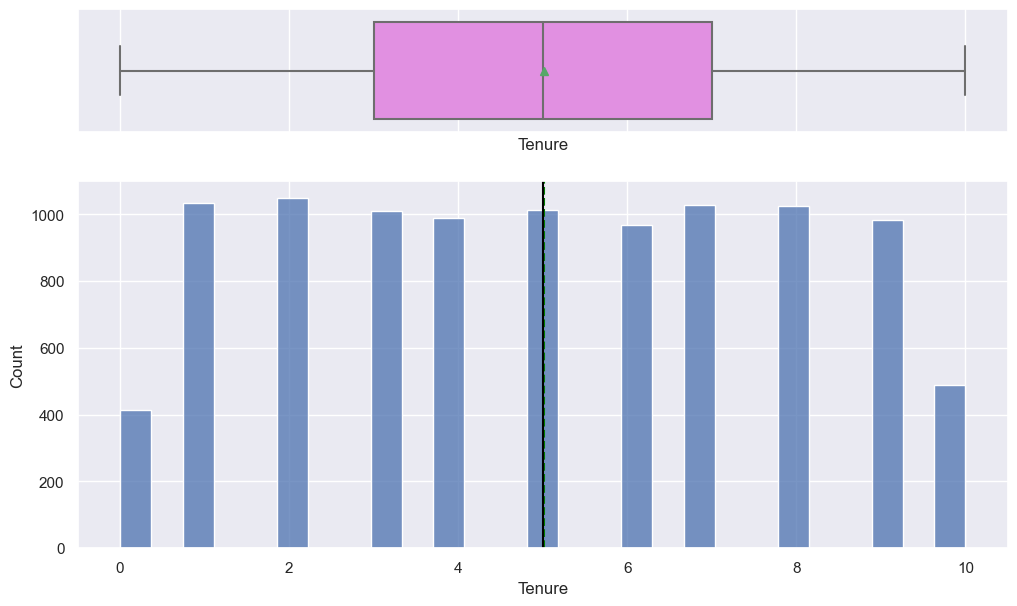

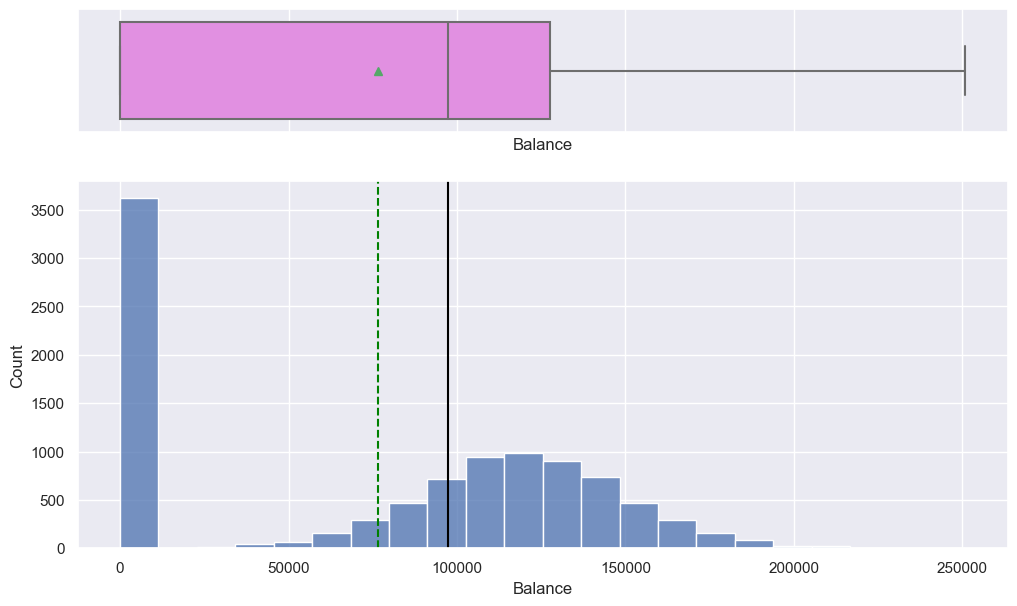

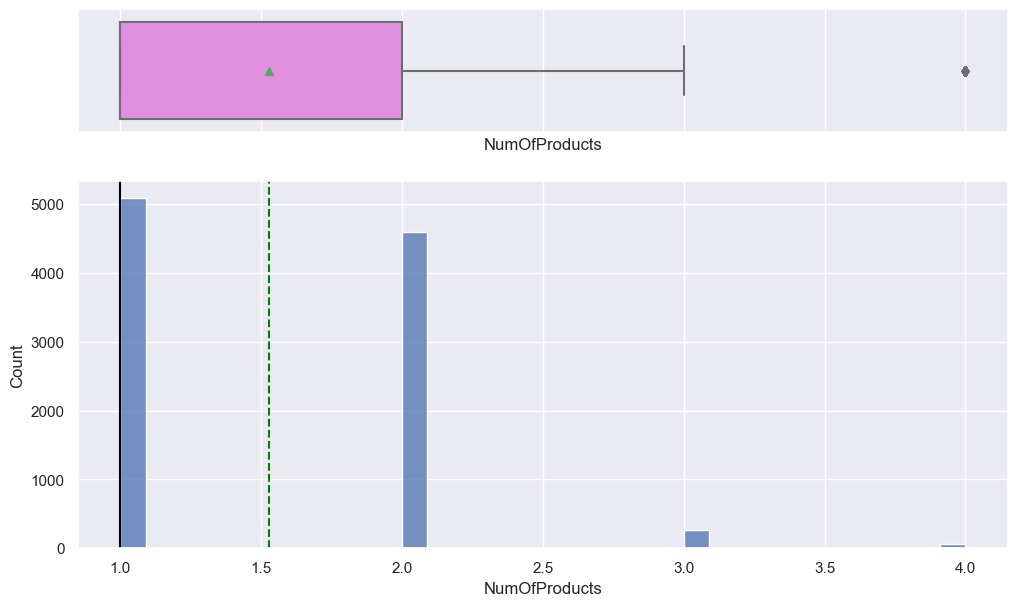

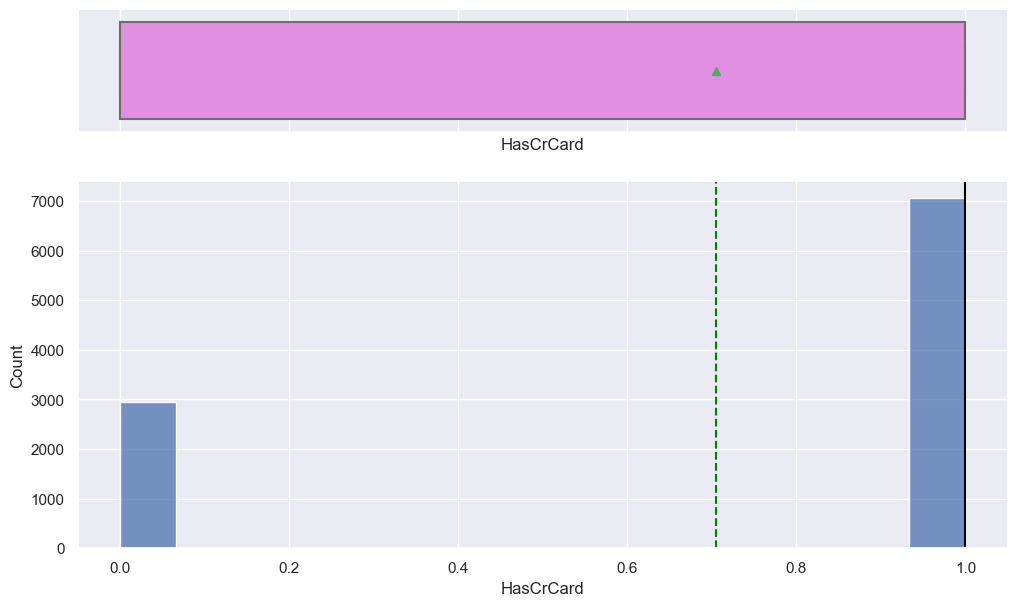

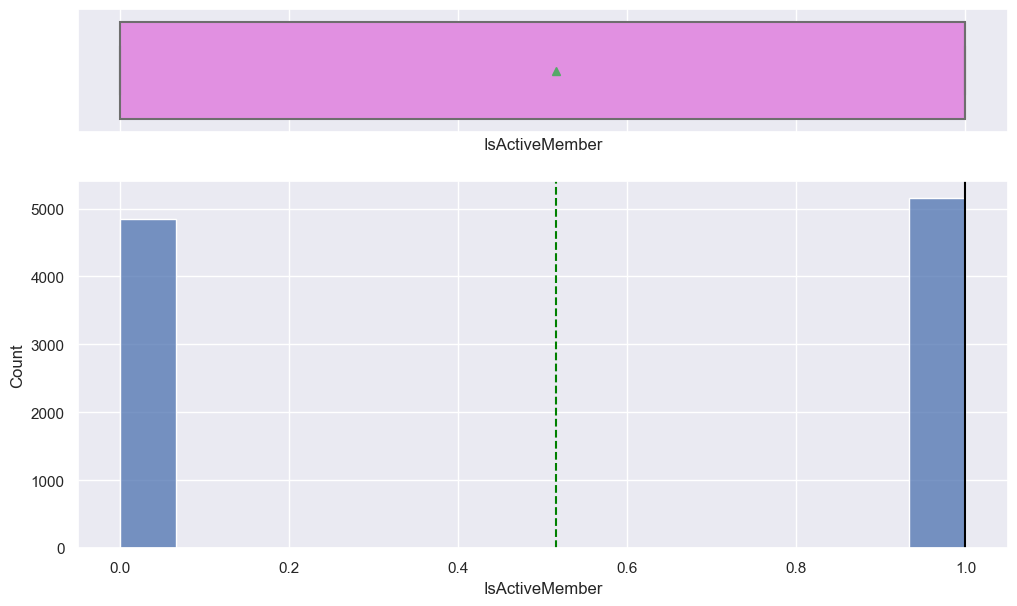

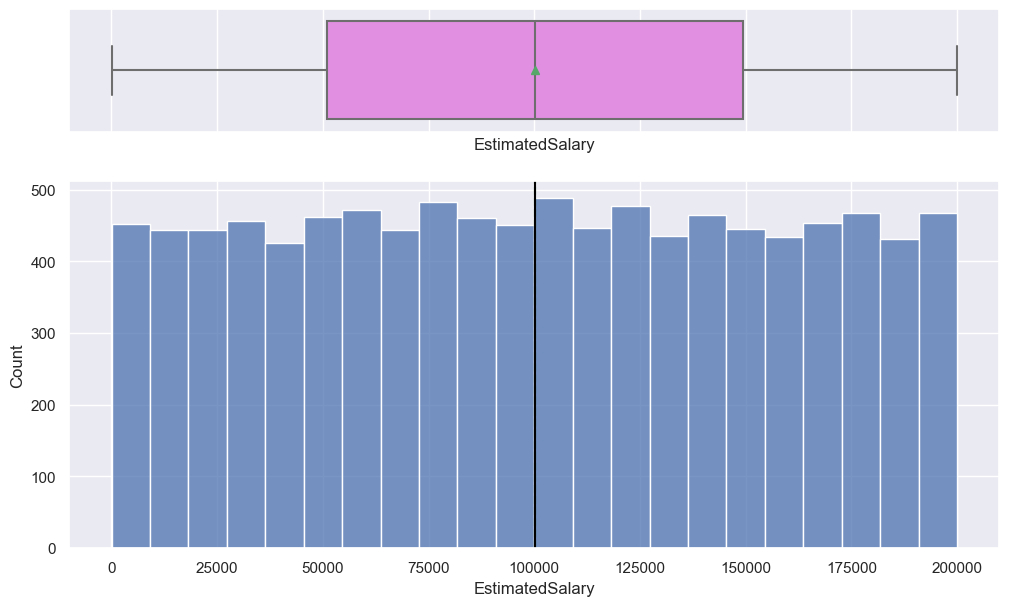

In [ ]:
#using histogram_boxplot to check for outlier
scale_variables = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']

for each in scale_variables:
    histogram_boxplot(churn, each)



In [ ]:
# Splitting the dataset into the Training and Testing set.
#X_big, X_test, y_big, y_test = train_test_split(X_data, y_data, test_size = 0.1, random_state = 5,shuffle = True)
# Splitting the dataset into the Training and validation set.
#X_train, X_val, y_train, y_val = train_test_split(X_big,y_big, test_size = 0.3, random_state = 5,shuffle = True)

In [ ]:
#print(X_train.shape)
#print(X_val.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_val.shape)
#print(y_test.shape)

(6300, 10)
(2700, 10)
(1000, 10)
(6300, 1)
(2700, 1)
(1000, 1)


In [ ]:
#Standardizing the Amount column (All other 'V' columns are already scaled as they've undergone PCA transformation).
from sklearn.preprocessing import StandardScaler
X_data['CreditScore'] = StandardScaler().fit_transform(X_data['CreditScore'].values.reshape(-1,1))  # Normalize in [-1,+1] range
X_data['Age'] = StandardScaler().fit_transform(X_data['Age'].values.reshape(-1,1))
X_data['Tenure'] = StandardScaler().fit_transform(X_data['Tenure'].values.reshape(-1,1))
X_data['Balance'] = StandardScaler().fit_transform(X_data['Balance'].values.reshape(-1,1))
X_data['NumOfProducts'] = StandardScaler().fit_transform(X_data['NumOfProducts'].values.reshape(-1,1))
X_data['HasCrCard'] = StandardScaler().fit_transform(X_data['HasCrCard'].values.reshape(-1,1))
X_data['IsActiveMember'] = StandardScaler().fit_transform(X_data['IsActiveMember'].values.reshape(-1,1))
X_data['EstimatedSalary'] = StandardScaler().fit_transform(X_data['EstimatedSalary'].values.reshape(-1,1))


In [ ]:
X_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,France,Female,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,Spain,Female,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,France,Female,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,France,Female,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,Spain,Female,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 7)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 10)
(2000, 10)
(8000,)
(2000,)


In [ ]:
# Using pd.get dummies to encode the categorical columns in the data
cat_data=["Geography","Gender"]
cat_data = list(cat_data)
X_train = pd.get_dummies(X_train,columns=cat_data,drop_first= True)
X_test = pd.get_dummies(X_test,columns=cat_data,drop_first= True)


In [ ]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
4989,-0.222754,0.102810,1.378686,-1.225848,-0.911583,0.646092,-1.030670,-1.738614,0,0,1
4498,-0.833213,-0.850726,-1.041760,0.880220,-0.911583,0.646092,0.970243,-0.906624,0,0,1
8876,-0.978068,0.674932,-0.695982,0.885964,-0.911583,0.646092,0.970243,0.146249,0,1,1
670,-0.274488,0.865639,-0.695982,0.735684,0.807737,-1.547768,-1.030670,-1.218450,1,0,0
9552,0.139383,0.198164,-0.004426,-1.225848,-0.911583,0.646092,0.970243,0.903604,0,0,0


In [ ]:
X_train = X_train.astype('float64')

#X_test = X_test.astype('float64')

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 4989 to 9412
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        8000 non-null   float64
 1   Age                8000 non-null   float64
 2   Tenure             8000 non-null   float64
 3   Balance            8000 non-null   float64
 4   NumOfProducts      8000 non-null   float64
 5   HasCrCard          8000 non-null   float64
 6   IsActiveMember     8000 non-null   float64
 7   EstimatedSalary    8000 non-null   float64
 8   Geography_Germany  8000 non-null   float64
 9   Geography_Spain    8000 non-null   float64
 10  Gender_Male        8000 non-null   float64
dtypes: float64(11)
memory usage: 750.0 KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1977 to 8486
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        2000 non-null   float64
 1   Age                2000 non-null   float64
 2   Tenure             2000 non-null   float64
 3   Balance            2000 non-null   float64
 4   NumOfProducts      2000 non-null   float64
 5   HasCrCard          2000 non-null   float64
 6   IsActiveMember     2000 non-null   float64
 7   EstimatedSalary    2000 non-null   float64
 8   Geography_Germany  2000 non-null   uint8  
 9   Geography_Spain    2000 non-null   uint8  
 10  Gender_Male        2000 non-null   uint8  
dtypes: float64(8), uint8(3)
memory usage: 146.5 KB


## Model Building

### Model Evaluation Criterion

### Model can make wrong predictions as:
* Predicting a staff exit , but the staff did not exit
* Predicting a staff did not exit , but the staff exit

### Which case is more important?
* Predicting a staff did not exit , but the staff exit. It could lead to high exit rate and lead to massive problem for HR to replace the staff, if the false negative was very high

### How to reduce this loss i.e need to reduce False Negative?
* Company  would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the Company can identify the staff who exit.

### Model Building: Neural Network (RMSProp)

---



In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = Sequential()
model.add(Dense(units=64, input_dim = 11, activation= 'relu'))

model.add(Dense(units= 32, activation= 'relu')) #hidden layer
model.add(Dense(units= 32, activation= 'relu')) #hidden layer
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,937
Trainable params: 3,937
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Create optimizer with default learning rate
# Compile the model
optimizer = RMSprop( learning_rate=0.001)
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#fitting the model
history=model.fit(X_train,y_train,batch_size=15,epochs=10,validation_split=0.2)

Epoch 1/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4211 - accuracy: 0.8266 - val_loss: 0.3891 - val_accuracy: 0.8413
Epoch 2/10
427/427 [==============================] - 1s 1ms/step - loss: 0.3561 - accuracy: 0.8545 - val_loss: 0.3653 - val_accuracy: 0.8556
Epoch 3/10
427/427 [==============================] - 1s 1ms/step - loss: 0.3443 - accuracy: 0.8580 - val_loss: 0.3607 - val_accuracy: 0.8500
Epoch 4/10
427/427 [==============================] - 1s 1ms/step - loss: 0.3386 - accuracy: 0.8634 - val_loss: 0.3652 - val_accuracy: 0.8506
Epoch 5/10
427/427 [==============================] - 1s 1ms/step - loss: 0.3357 - accuracy: 0.8619 - val_loss: 0.3619 - val_accuracy: 0.8512
Epoch 6/10
427/427 [==============================] - 1s 1ms/step - loss: 0.3315 - accuracy: 0.8653 - val_loss: 0.3717 - val_accuracy: 0.8537
Epoch 7/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3296 - accuracy: 0.8642 - val_loss: 0.3803 - val_accuracy: 0.8469
Epoch 

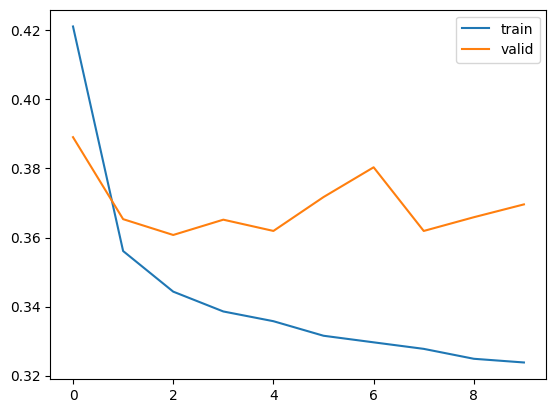

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [ ]:
score = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 926us/step - loss: 0.3550 - accuracy: 0.8600


In [ ]:
print(score)

[0.35502079129219055, 0.8600000143051147]


63/63 [==============================] - 0s 935us/step


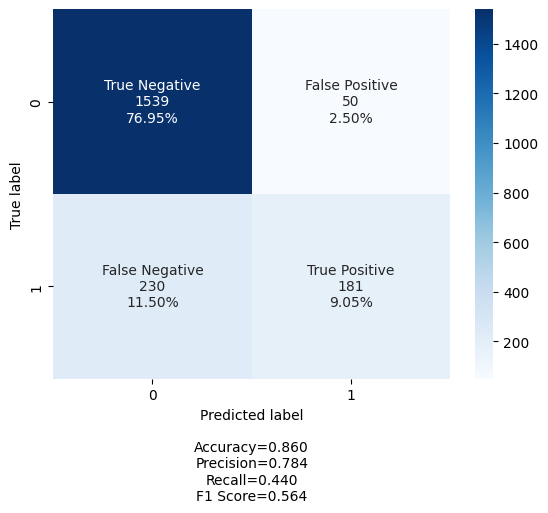

In [ ]:
## Confusion Matrix on unseen test set
import seaborn as sn
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2,
                      group_names=labels,
                      #categories=categories,
                      cmap='Blues')

### Model Building: Neural Network model with Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model2 = Sequential()
#model.add(Dense(units=16, activation= 'relu', input_shape=(10,))) #input 10 columns from seen above
model2.add(Dense(units=16, input_dim = 11, activation= 'relu'))

model2.add(Dense(units= 64, activation= 'relu')) #hidden layer
model2.add(Dense(units= 32, activation= 'relu')) #hidden layer
model2.add(Dense(units= 32, activation= 'relu')) #hidden layer
model2.add(Dense(1,activation='sigmoid'))

In [ ]:
# Create optimizer with default learning rate
# Compile the model
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 64)                1088      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,449
Trainable params: 4,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#fitting the model
history=model2.fit(X_train,y_train,batch_size=15,epochs=10,validation_split=0.2)

Epoch 1/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4438 - accuracy: 0.8052 - val_loss: 0.4345 - val_accuracy: 0.8181
Epoch 2/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3769 - accuracy: 0.8436 - val_loss: 0.3752 - val_accuracy: 0.8500
Epoch 3/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3477 - accuracy: 0.8542 - val_loss: 0.3614 - val_accuracy: 0.8556
Epoch 4/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3364 - accuracy: 0.8603 - val_loss: 0.3765 - val_accuracy: 0.8413
Epoch 5/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3329 - accuracy: 0.8594 - val_loss: 0.3617 - val_accuracy: 0.8500
Epoch 6/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3292 - accuracy: 0.8653 - val_loss: 0.3746 - val_accuracy: 0.8525
Epoch 7/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3262 - accuracy: 0.8659 - val_loss: 0.3735 - val_accuracy: 0.8544
Epoch 

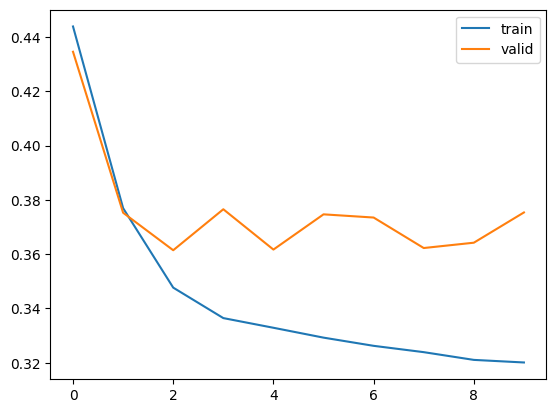

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [ ]:
score = model2.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3560 - accuracy: 0.8605


In [ ]:
print(score)

[0.35601404309272766, 0.8604999780654907]


63/63 [==============================] - 0s 1ms/step


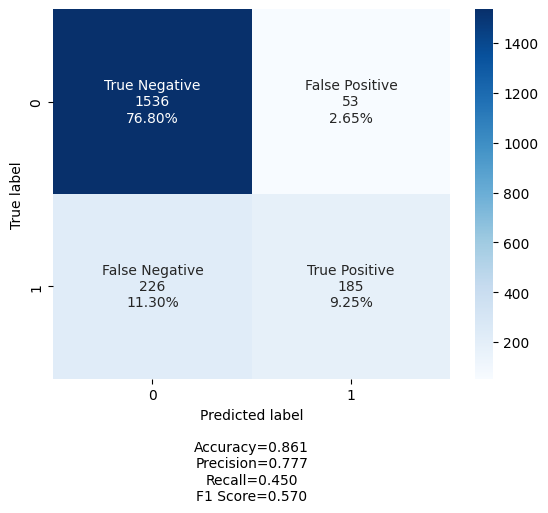

In [ ]:
## Confusion Matrix on unseen test set
import seaborn as sn
y_pred1 = model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2,
                      group_names=labels,
                      #categories=categories,
                      cmap='Blues')

In [ ]:
#Adam optimiser with early stopping

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model3 = Sequential()
#model.add(Dense(units=16, activation= 'relu', input_shape=(10,))) #input 10 columns from seen above
model3.add(Dense(units=16, input_dim = 11, activation= 'relu'))

model3.add(Dense(units= 64, activation= 'relu')) #hidden layer
model3.add(Dense(units= 32, activation= 'relu')) #hidden layer
model3.add(Dense(units= 32, activation= 'relu')) #hidden layer
model3.add(Dense(1,activation='sigmoid'))

In [ ]:
# Create optimizer with default learning rate
# Compile the model
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 64)                1088      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,449
Trainable params: 4,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# include EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fitting the model with early stopping
history = model3.fit(X_train, y_train, batch_size=15, epochs=10, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4438 - accuracy: 0.8052 - val_loss: 0.4345 - val_accuracy: 0.8181
Epoch 2/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3769 - accuracy: 0.8436 - val_loss: 0.3752 - val_accuracy: 0.8500
Epoch 3/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3477 - accuracy: 0.8542 - val_loss: 0.3614 - val_accuracy: 0.8556
Epoch 4/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3364 - accuracy: 0.8603 - val_loss: 0.3765 - val_accuracy: 0.8413
Epoch 5/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3329 - accuracy: 0.8594 - val_loss: 0.3617 - val_accuracy: 0.8500
Epoch 6/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3292 - accuracy: 0.8653 - val_loss: 0.3746 - val_accuracy: 0.8525
Epoch 7/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3262 - accuracy: 0.8659 - val_loss: 0.3735 - val_accuracy: 0.8544
Epoch 

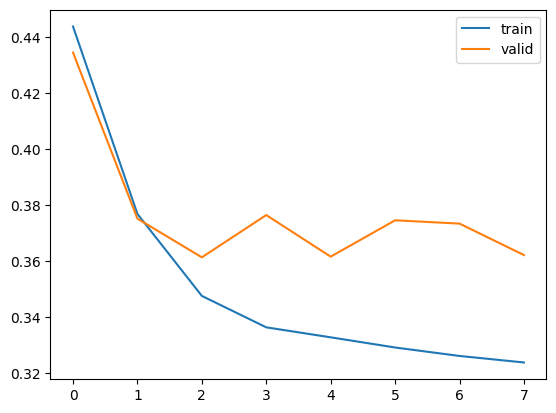

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [ ]:
score = model3.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3499 - accuracy: 0.8615


In [ ]:
print(score)

[0.3498844802379608, 0.8615000247955322]


63/63 [==============================] - 0s 939us/step


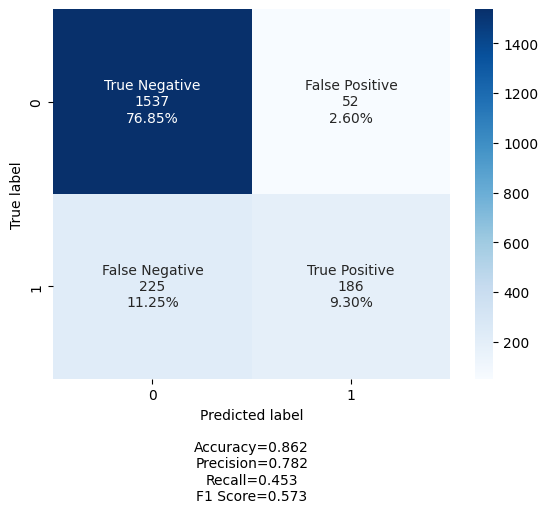

In [ ]:
## Confusion Matrix on unseen test set
import seaborn as sn
y_pred1 = model3.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2,
                      group_names=labels,
                      #categories=categories,
                      cmap='Blues')

### Model Improvement: Neural Network model with Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model4 = Sequential()
model4.add(Dense(units=16, input_dim = 11, activation= 'relu'))

model4.add(Dense(units= 64, activation= 'relu')) #hidden layer
model4.add(Dropout(0.5)) #add dropout layer

model4.add(Dense(units= 32, activation= 'relu')) #hidden layer
model4.add(Dropout(0.5)) #add dropout layer

model4.add(Dense(units= 32, activation= 'relu')) #hidden layer
model4.add(Dense(1,activation='sigmoid'))

In [ ]:
# Create optimizer with default learning rate
# Compile the model
model4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 64)                1088      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 1)                 3

In [ ]:
#fitting the model
history=model4.fit(X_train,y_train,batch_size=15,epochs=10,validation_split=0.2)

Epoch 1/10
427/427 [==============================] - 2s 3ms/step - loss: 0.4878 - accuracy: 0.7962 - val_loss: 0.4568 - val_accuracy: 0.7894
Epoch 2/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4475 - accuracy: 0.7981 - val_loss: 0.4462 - val_accuracy: 0.7894
Epoch 3/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4309 - accuracy: 0.7986 - val_loss: 0.4371 - val_accuracy: 0.8000
Epoch 4/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4118 - accuracy: 0.8156 - val_loss: 0.4089 - val_accuracy: 0.8300
Epoch 5/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3935 - accuracy: 0.8286 - val_loss: 0.3805 - val_accuracy: 0.8462
Epoch 6/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3776 - accuracy: 0.8406 - val_loss: 0.3747 - val_accuracy: 0.8469
Epoch 7/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3651 - accuracy: 0.8469 - val_loss: 0.3622 - val_accuracy: 0.8575
Epoch 

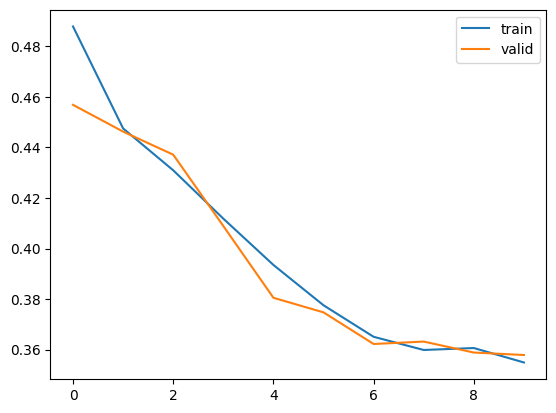

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

When dropout layer is added, the overfit of model to training data is much reduced.

In [ ]:
score = model4.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3505 - accuracy: 0.8580


63/63 [==============================] - 0s 910us/step


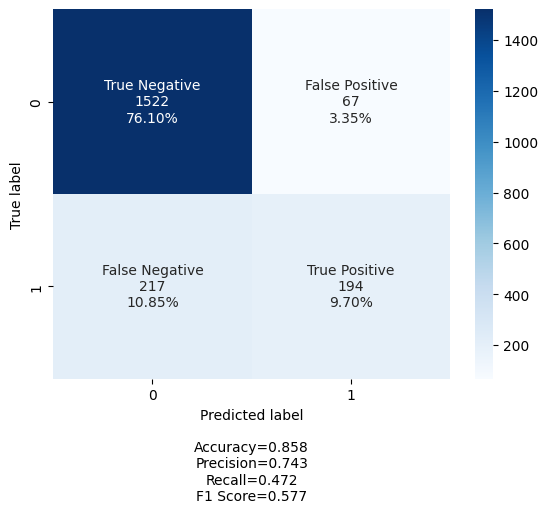

In [ ]:
## Confusion Matrix on unseen test set
import seaborn as sn
y_pred1 = model4.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2,
                      group_names=labels,
                      #categories=categories,
                      cmap='Blues')

### Model Improvement: Neural Network model with Hyperparameter tuning

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
#create a model function
def create_model(optimizer='adam', units1=64, units2=32, units3=32):
    model = Sequential()
    model.add(Dense(units=16, input_dim=11, activation='relu'))
    model.add(Dense(units=units1, activation='relu'))
    model.add(Dense(units=units2, activation='relu'))
    model.add(Dense(units=units3, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# use the KerasClassifier
keras_model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=15, verbose=0)

# Define hyperparameters to tune
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'units1': [32, 64],
    'units2': [16, 32],
    'units3': [16, 32]
}

# Create GridSearchCV
grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and accuracy
print("Best parameters found: ", grid_result.best_params_)
print("Best accuracy found: ", grid_result.best_score_)

Best parameters found:  {'optimizer': 'rmsprop', 'units1': 64, 'units2': 32, 'units3': 32}
Best accuracy found:  0.8602509697278341


In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model5 = Sequential()
#model.add(Dense(units=16, activation= 'relu', input_shape=(10,))) #input 10 columns from seen above
model5.add(Dense(units=16, input_dim = 11, activation= 'relu'))

model5.add(Dense(units= 64, activation= 'relu')) #hidden layer
model5.add(Dense(units= 32, activation= 'relu')) #hidden layer
model5.add(Dense(units= 32, activation= 'relu')) #hidden layer
model5.add(Dense(1,activation='sigmoid'))

In [ ]:
# Create optimizer with default learning rate
# Compile the model
optimizer = RMSprop( learning_rate=0.001)
model5.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model5.summary()

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_245 (Dense)           (None, 16)                192       
                                                                 
 dense_246 (Dense)           (None, 64)                1088      
                                                                 
 dense_247 (Dense)           (None, 32)                2080      
                                                                 
 dense_248 (Dense)           (None, 32)                1056      
                                                                 
 dense_249 (Dense)           (None, 1)                 33        
                                                                 
Total params: 4,449
Trainable params: 4,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#fitting the model
history=model5.fit(X_train,y_train,batch_size=15,epochs=10,validation_split=0.2)

Epoch 1/10
427/427 [==============================] - 3s 3ms/step - loss: 0.4545 - accuracy: 0.8050 - val_loss: 0.4354 - val_accuracy: 0.8188
Epoch 2/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3865 - accuracy: 0.8375 - val_loss: 0.3910 - val_accuracy: 0.8394
Epoch 3/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3586 - accuracy: 0.8531 - val_loss: 0.3790 - val_accuracy: 0.8413
Epoch 4/10
427/427 [==============================] - 1s 3ms/step - loss: 0.3496 - accuracy: 0.8564 - val_loss: 0.3780 - val_accuracy: 0.8431
Epoch 5/10
427/427 [==============================] - 1s 3ms/step - loss: 0.3442 - accuracy: 0.8594 - val_loss: 0.3756 - val_accuracy: 0.8444
Epoch 6/10
427/427 [==============================] - 1s 3ms/step - loss: 0.3408 - accuracy: 0.8628 - val_loss: 0.3733 - val_accuracy: 0.8506
Epoch 7/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3373 - accuracy: 0.8645 - val_loss: 0.3953 - val_accuracy: 0.8544
Epoch 

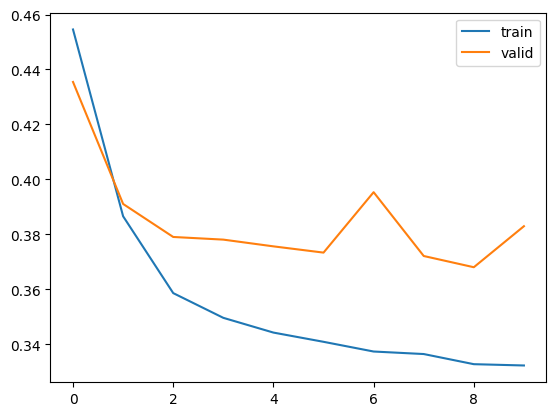

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [ ]:
score = model5.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3692 - accuracy: 0.8540


In [ ]:
print(score)

[0.36917537450790405, 0.8539999723434448]


63/63 [==============================] - 0s 903us/step


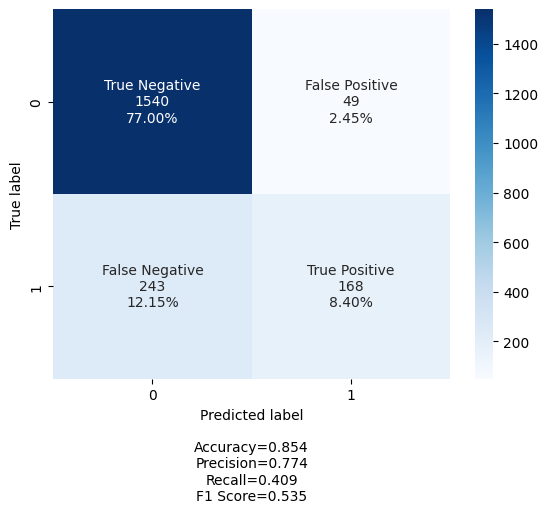

In [ ]:
## Confusion Matrix on unseen test set
import seaborn as sn
y_pred1 = model5.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2,
                      group_names=labels,
                      #categories=categories,
                      cmap='Blues')

### Model Improvement: Neural Network model with balanced data

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight = "balanced", classes = np.unique(y_train), y=np.array([y_train.iloc[i] for i in range(len(y_train))]))
class_weights = class_weight.compute_class_weight(class_weight = "balanced",classes = np.unique(y_train), y = y_train)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.627549419516787, 1: 2.4600246002460024}

The class 'Exited' (y=1) is assigned a weight of 2.460025 vs 0.627549 for the class 'not exited' due to the lower freqeuency detected in EDA. This allows the model to give more importance to the errors made on exited cases during training.

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model6 = Sequential()
model6.add(Dense(units=64, input_dim = 11, activation= 'relu'))

model6.add(Dense(units= 32, activation= 'relu')) #hidden layer
model6.add(Dense(units= 32, activation= 'relu')) #hidden layer
model6.add(Dense(1,activation='sigmoid'))

In [ ]:
model6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,937
Trainable params: 3,937
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Create optimizer with default learning rate
# Compile the model
optimizer = RMSprop( learning_rate=0.001)
model6.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#fitting the model
history=model6.fit(X_train,y_train,batch_size=15,epochs=10,validation_split=0.2,
                   class_weight=class_weights,shuffle=True)

Epoch 1/10
427/427 [==============================] - 2s 2ms/step - loss: 0.5598 - accuracy: 0.7250 - val_loss: 0.4773 - val_accuracy: 0.7775
Epoch 2/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4814 - accuracy: 0.7847 - val_loss: 0.4454 - val_accuracy: 0.7931
Epoch 3/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4673 - accuracy: 0.7881 - val_loss: 0.4538 - val_accuracy: 0.7931
Epoch 4/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4589 - accuracy: 0.8036 - val_loss: 0.4989 - val_accuracy: 0.7538
Epoch 5/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4536 - accuracy: 0.8016 - val_loss: 0.4520 - val_accuracy: 0.7962
Epoch 6/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4502 - accuracy: 0.8039 - val_loss: 0.4148 - val_accuracy: 0.8169
Epoch 7/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4467 - accuracy: 0.8094 - val_loss: 0.4245 - val_accuracy: 0.8087
Epoch 

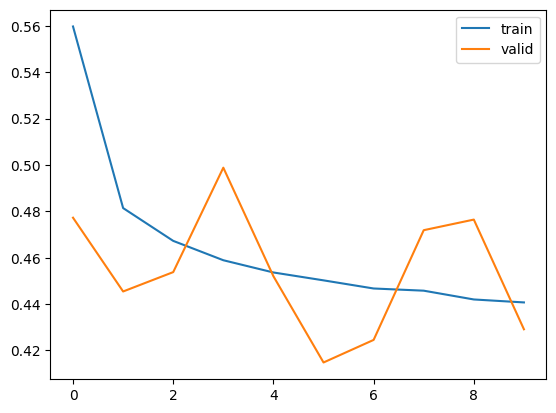

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [ ]:
score = model6.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.4240 - accuracy: 0.8185


In [ ]:
print(score)

[0.4240465760231018, 0.8184999823570251]


63/63 [==============================] - 0s 971us/step


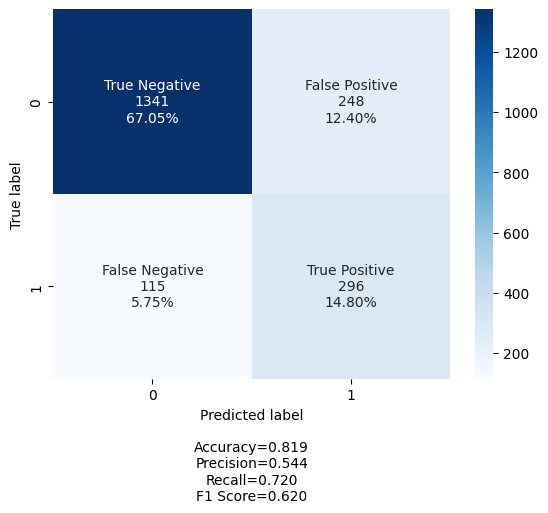

In [ ]:
## Confusion Matrix on unseen test set
import seaborn as sn
y_pred1 = model6.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2,
                      group_names=labels,
                      #categories=categories,
                      cmap='Blues')

When the data is balanced, more importance is assigned to exited customers. The false negative decreases to a lower value 5.75%, while the recall increases to a higher value of =0.720.

## Final Model

In [ ]:
def model_performance_classification_sklearn(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          sum_stats=True,
                          title=None):



    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": accuracy,
            "Recall": recall,
            "Precision": precision,
            "F1": f1_score

        },
        index=[0],
    )

    return df_perf



In [ ]:
# Checking model's 1 performance on test set
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)

model1_result = model_performance_classification_sklearn(cm2
                      )
model1_result

63/63 [==============================] - 0s 876us/step


,Accuracy,Recall,Precision,F1
0,0.86,0.440389,0.78355,0.563863


In [ ]:
# Checking model's 2 performance on test set
y_pred1 = model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)

model2_result = model_performance_classification_sklearn(cm2
                      )
model2_result

63/63 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1
0,0.8605,0.450122,0.777311,0.570108


In [ ]:
# Checking model's 3 performance on test set
y_pred1 = model3.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)

model3_result = model_performance_classification_sklearn(cm2
                      )
model3_result

63/63 [==============================] - 0s 900us/step


,Accuracy,Recall,Precision,F1
0,0.8615,0.452555,0.781513,0.57319


In [ ]:
# Checking model's 4 performance on test set
y_pred1 = model4.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)

model4_result = model_performance_classification_sklearn(cm2
                      )
model4_result

63/63 [==============================] - 0s 905us/step


,Accuracy,Recall,Precision,F1
0,0.858,0.472019,0.743295,0.577381


In [ ]:
# Checking model's 2 performance on test set
y_pred1 = model5.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)

model5_result = model_performance_classification_sklearn(cm2
                      )
model5_result

63/63 [==============================] - 0s 928us/step


,Accuracy,Recall,Precision,F1
0,0.854,0.408759,0.774194,0.535032


In [ ]:
# Checking model's 6 performance on test set
y_pred1 = model6.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)

model6_result = model_performance_classification_sklearn(cm2
                      )
model6_result

63/63 [==============================] - 0s 905us/step


,Accuracy,Recall,Precision,F1
0,0.8185,0.720195,0.544118,0.619895


In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model1_result.T,
        model2_result.T,
        model3_result.T,
        model4_result.T,
        model5_result.T,
        model6_result.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Model1",
    "Model2",
    "Model3",
    "Model4",
    "Model5",
    "Model6",
]
print("Testing performance comparison:")
models_train_comp_df

Testing performance comparison:


,Model1,Model2,Model3,Model4,Model5,Model6
Accuracy,0.860000,0.860500,0.861500,0.858000,0.854000,0.818500
Recall,0.440389,0.450122,0.452555,0.472019,0.408759,0.720195
Precision,0.783550,0.777311,0.781513,0.743295,0.774194,0.544118
F1,0.563863,0.570108,0.573190,0.577381,0.535032,0.619895


Model 3 (RMS with early stopping) architecture will be taken for its highest accuracy. In order to reduce overfit, Model 4 dropout will be added. In order to improve recall score, model 6 balanced data will be added to the final model.

In [ ]:
#Adam optimiser with early stopping

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model_final = Sequential()
model_final.add(Dense(units=16, input_dim = 11, activation= 'relu'))

model_final.add(Dense(units= 64, activation= 'relu')) #hidden layer

model_final.add(Dense(units= 32, activation= 'relu')) #hidden layer
model_final.add(Dropout(0.5)) #add dropout layer

model_final.add(Dense(units= 32, activation= 'relu')) #hidden layer
model_final.add(Dropout(0.5)) #add dropout layer

model_final.add(Dense(1,activation='sigmoid'))

In [ ]:
# Create optimizer with default learning rate
# Compile the model
model_final.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_final.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 64)                1088      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 3

In [ ]:
# include EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fitting the model with early stopping
history = model_final.fit(X_train, y_train, batch_size=15, epochs=20, validation_split=0.2,
                          callbacks=[early_stopping],class_weight=class_weights,shuffle=True)


Epoch 1/20
427/427 [==============================] - 2s 5ms/step - loss: 0.4667 - accuracy: 0.8012 - val_loss: 0.4558 - val_accuracy: 0.7987
Epoch 2/20
427/427 [==============================] - 2s 4ms/step - loss: 0.4669 - accuracy: 0.7987 - val_loss: 0.4617 - val_accuracy: 0.7912
Epoch 3/20
427/427 [==============================] - 1s 2ms/step - loss: 0.4633 - accuracy: 0.7952 - val_loss: 0.4488 - val_accuracy: 0.7987
Epoch 4/20
427/427 [==============================] - 1s 2ms/step - loss: 0.4565 - accuracy: 0.8067 - val_loss: 0.4870 - val_accuracy: 0.7781
Epoch 5/20
427/427 [==============================] - 1s 3ms/step - loss: 0.4567 - accuracy: 0.8023 - val_loss: 0.4440 - val_accuracy: 0.7950
Epoch 6/20
427/427 [==============================] - 1s 2ms/step - loss: 0.4555 - accuracy: 0.7961 - val_loss: 0.4208 - val_accuracy: 0.8037
Epoch 7/20
427/427 [==============================] - 1s 2ms/step - loss: 0.4522 - accuracy: 0.7973 - val_loss: 0.4502 - val_accuracy: 0.7900
Epoch 

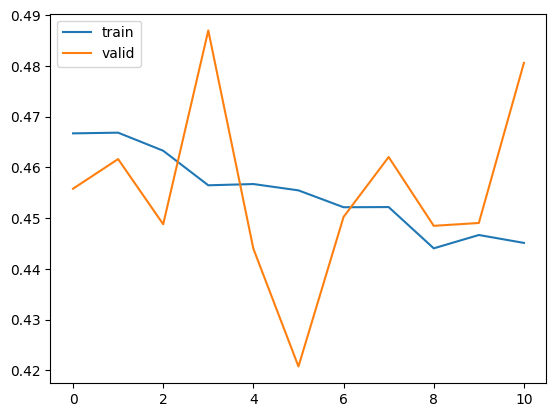

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [ ]:
score = model_final.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.4265 - accuracy: 0.8065


In [ ]:
print(score)

[0.42653095722198486, 0.8065000176429749]


63/63 [==============================] - 0s 1ms/step


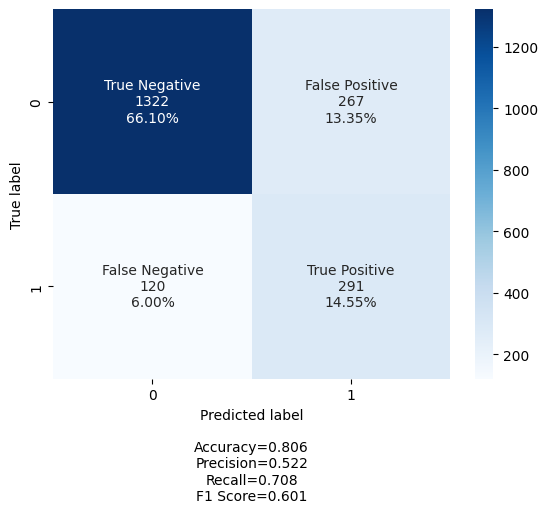

In [ ]:
## Confusion Matrix on unseen test set
import seaborn as sn
y_pred1 = model_final.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2,
                      group_names=labels,
                      #categories=categories,
                      cmap='Blues')

Accuracy is fairly high at a value of 0.806. Recall is also improved at a value of = 0.708. By including dropout layer, overfit of model on training data is much reduced.

## Actionable Insights and Recommendations

**What recommedations would you suggest to the bank?**

* Those who are female are more likely to become Exited customers. There could be more programmes to incentivise female customers to maintain loyalty and not exit, such as Female Card Membership.
* Those who are German are more likely to become Exited customers, compared to the other two countries.More personalisation can be made for German customers like sending holiday updates and connection during German holidays or catering customer service to their local language or customs.
- More marketing effort is encouraged to target the customers who are Female or German to provide more incentives to retain them as customers. These could include their preferred programmes like discounts or membership rewards, even national holiday promotions in country specific to Germany.
- More monitoring can be made to these profiles of customers who are likely to Exit. Feedback can be gathered from them regularly to see if they have an dissatisfaction or pain points the bank could address. For example, unhappiness with certain transaction fees.
- A decision tree could be drawn to identify the strongest feature importances in the chosen tree model predicting an Exit customers. These particular attributes from the feature importance will be closely tracked in the customers with the profiles of 'Female' or 'German'.  
- In the chosen model, the best input nodes and optimiser is decided with the gridSearchCV. These parameters are then used for the basic neural network model.
- Furthermore, overfit is addressed and recall is increased by including dropout layers and balancing the data.

___